<a href="https://colab.research.google.com/github/UmaNagirireddi/ML_Assignment1/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [263]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


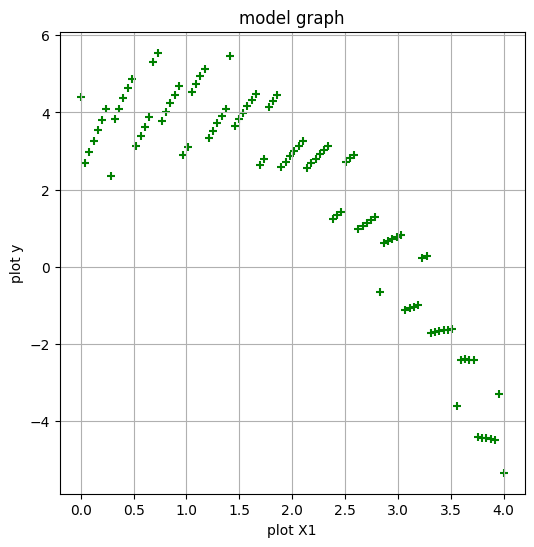

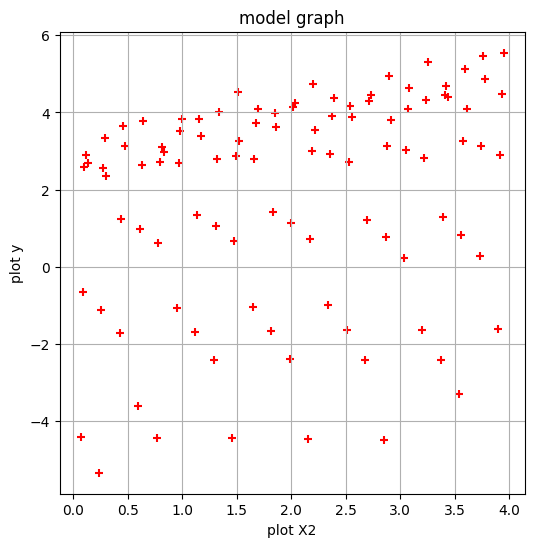

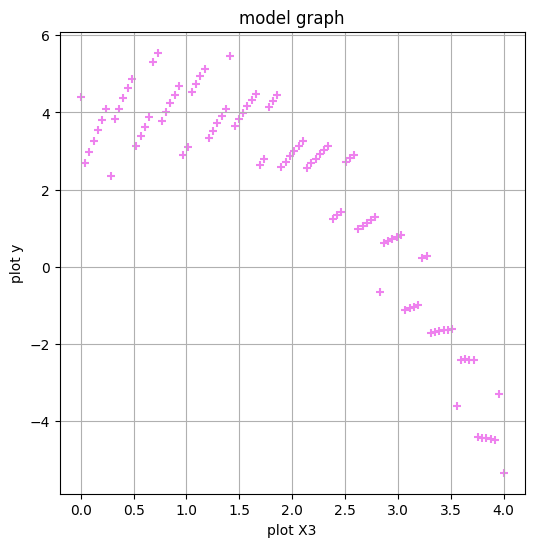

In [264]:
df = pd.read_csv('/content/D3.csv')
X1 = df.values[:,0]
X2 = df.values[:,1]
X3 = df.values[:,2]
Y = df.values[:,3]

# Plot X1
plt.scatter(X1, Y, color='Green',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot X1')
plt.ylabel('plot y')
plt.title('model graph')

plt.show()

# Plot X2
plt.scatter(X2, Y, color='Red',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot X2')
plt.ylabel('plot y')
plt.title('model graph')
plt.show()

# Plot X3
plt.scatter(X1, Y, color='Violet',marker='+')
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('plot X3')
plt.ylabel('plot y')
plt.title('model graph')

plt.show()


In [265]:
m = len(X1) #dim of data column
X0 = np.ones((m,1)) #creates X0 filled with 1s
X1 = X1.reshape(m,1) #transposes explanatory columns
X2 = X2.reshape(m,1)
X3 = X3.reshape(m,1)
Y = Y.reshape(m,1)

In [266]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [267]:
iterations = 3000
alpha = 0.01
X = np.column_stack((X0, X1))
theta = np.zeros((2, 1))
theta, loss_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Theta for X1:', theta[1])
print('Theta for X0 (bias):', theta[0])

Theta for X1: [-2.03541173]
Theta for X0 (bias): [5.92043383]


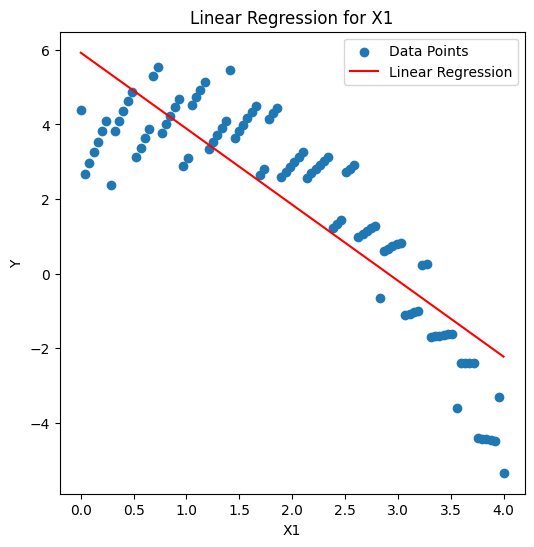

In [268]:
plt.scatter(X1, Y, label='Data Points')
plt.plot(X1, X @ theta, color='red', label='Linear Regression')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression for X1')
plt.legend()


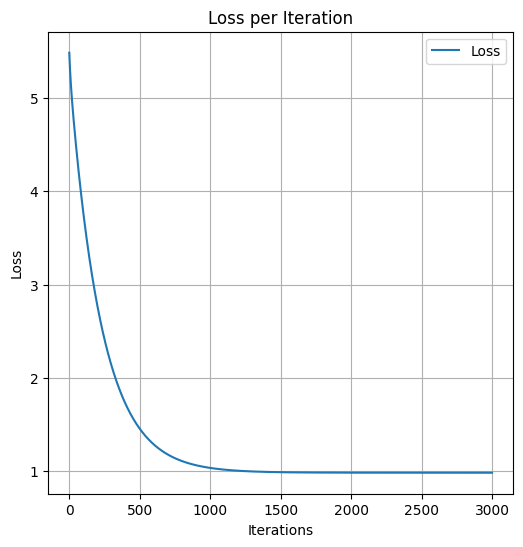

In [269]:
plt.plot(range(iterations), loss_history, label='Loss')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration')
plt.legend()

In [270]:
iterations = 1500
alpha = 0.08
X = np.column_stack((X0, X2))
theta = np.zeros((2, 1))
theta, loss_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Theta for X2:', theta[1])
print('Theta for X0 (bias):', theta[0])


Theta for X2: [0.55760761]
Theta for X0 (bias): [0.73606043]


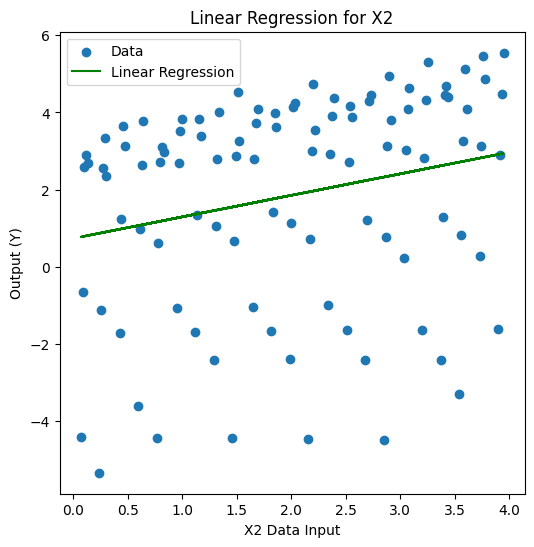

In [271]:

plt.scatter(X2, Y, label='Data')
plt.plot(X2, X.dot(theta), color='green', label='Linear Regression')
plt.xlabel('X2 Data Input')
plt.ylabel('Output (Y)')
plt.title('Linear Regression for X2')
plt.legend()

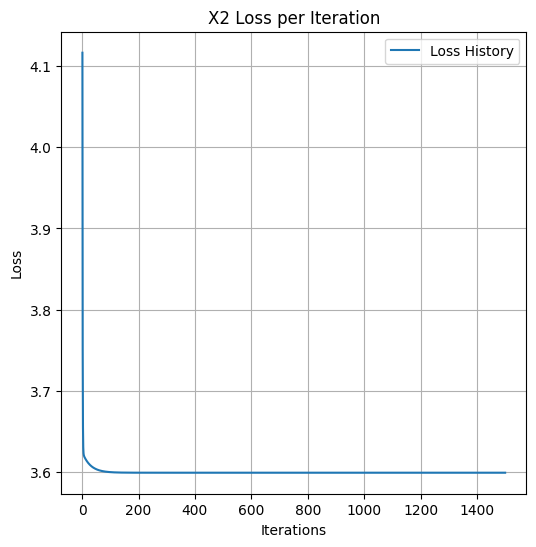

In [272]:
plt.plot(range(1, iterations + 1), loss_history, label='Loss History')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('X2 Loss per Iteration')
plt.grid(True)
plt.legend()

In [273]:
iterations = 3000
alpha = 0.01
X = np.hstack((X0,X3))
theta = np.zeros((2,1))
theta, loss_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Theta X3 =', theta)

Theta X3 = [[ 2.86831421]
 [-0.51925373]]


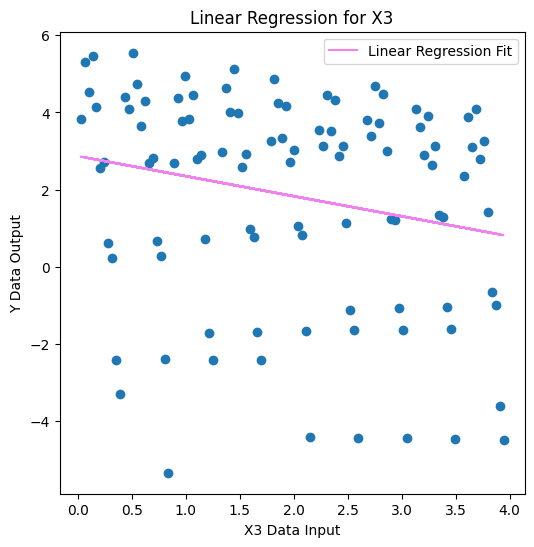

In [274]:
plt.scatter(X3, Y)
plt.plot(X3, X.dot(theta), color = 'Violet', label = 'Linear Regression Fit')
plt.xlabel('X3 Data Input')
plt.ylabel('Y Data Output')
plt.title('Linear Regression for X3')
plt.legend()
plt.show()

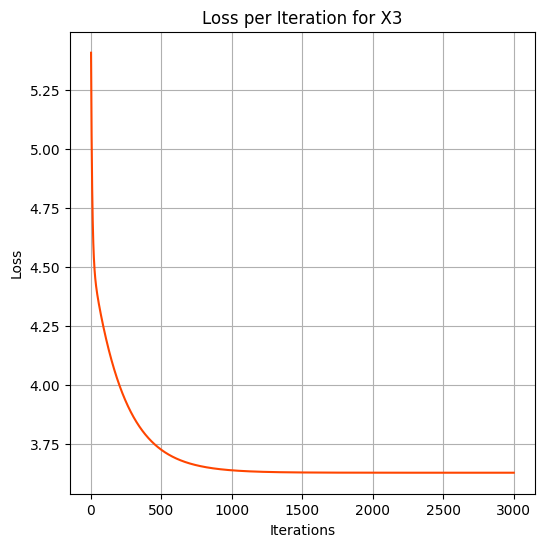

In [275]:

plt.plot(range(1, iterations + 1), loss_history, color='orangered')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss per Iteration for X3')
plt.show()

In [276]:
iterations = 5000
alpha = 0.01
X = np.hstack((X0,X1,X2,X3))
theta = np.ones((4,1)) * 0.5

theta, loss_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final theta for X_ALL:', theta)
print('Final loss:', loss_history[-1])

Final theta for X_ALL: [[ 5.28046548]
 [-1.99895835]
 [ 0.53813233]
 [-0.26066188]]
Final loss: 0.738524743608434


Prediction 1 ([1 1 1]) = [3.55897758]
Prediction 2 ([2 0 4]) = [0.23990126]
Prediction 3 ([3 2 1]) = [0.09919322]


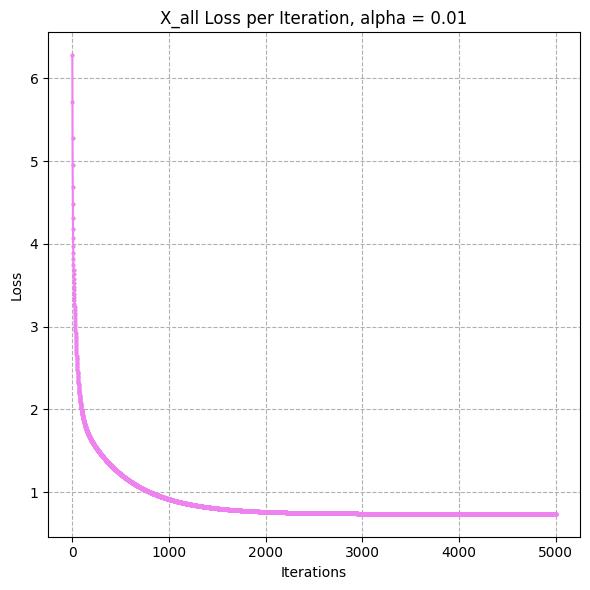

In [277]:
plt.plot(range(1, iterations + 1), loss_history, color='Violet', marker='o', markersize=2)
plt.grid(linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('X_all Loss per Iteration, alpha = 0.01')
plt.tight_layout()
X_test = np.array([[1,1,1,1], [1,2,0,4], [1,3,2,1]])
predictions = X_test.dot(theta)

for i, prediction in enumerate(predictions):
  print(f'Prediction {i+1} ({X_test[i,1:]}) = {prediction}')